<a href="https://colab.research.google.com/github/nihalhabeeb/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

Mounting google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The first step is to import neccessary libraries

In [3]:
## Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Download the dataset to use it as a pandas dataframe 

In [4]:
file_path = '/content/drive/MyDrive/AlmaBetter/Capstone Projects/EDA/Hotel Bookings.csv'
hotel_df = pd.read_csv(file_path)  

Lets find the shape of the dataset.

In [ ]:
hotel_df.shape

(119390, 32)

Great..! We know that our dataset has 119390 rows and 32 columns

In [ ]:
list(hotel_df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

describe() method can be used to get statistical information about the dataset. We were able to make some very useful findings using this information (which comes later in the notebook).

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Preparing and Cleaning the Dataset

### Handing Null Values

Now lets find out how many cells are missing from our data set

In [ ]:
hotel_df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

The percentage of null values in each columns give a better picture and will help us to decide if any columns have to be removed.

In [ ]:
hotel_df.isnull().sum().sort_values(ascending = False)/len(hotel_df.index)*100

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
is_canceled                        0.000000
market_segment                     0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
babies                             0.000000
meal                               0.000000
reservation_status_date            0.000000
distribution_channel               0.000000
reservation_status                 0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type              

The 'company' column has aroun 94% null values! The 'agent' column has much less but still non-negligible amount (around 14%) of null values. The 'country' and 'children' have negligible amount of null values.

In [ ]:
hotel_df['agent'][10]

240.0

The 'agent' column consists of float values. A little research about the dataset on the internet revealed that this column refers to the agent's ID. So, the null values cannot be replaced by a value calculated from the rest of the values to make any sense. Since, they are just IDs it is better to remove the column entirely as they won't be necessary in any analysis considering the fact that a good amount of null values are present.

The 'company' column can be removed easily as most of the values are null. Those values also refer to the company ID and removing them is not an issue anyway.

In [5]:
hotel_df = hotel_df.drop(columns=['company','agent'],axis=1)

The 'children' and 'country' columns have some null values. Those rows which contain the null values can be removed from the analysis.

In [6]:
# dropping the rows with null values completely
hotel_df = hotel_df.dropna(axis=0)

Now we can see that there are no null values in the data set

In [7]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Handling Some Data That Don't Make Any Sense!

From the describe() method used earlier we noticed something. The minimum value of adults column is zero. While it is possible that there are bookings done by children only without any adult present it is better to check those data carefully.

In [8]:
# getting the data with adults column having zero value
hotel_df[hotel_df.adults == 0].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,122,Transient-Party,0.0,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,122,Transient-Party,0.0,0,0,Check-Out,2016-01-05


There are bookings where the number of adults, children and babies are zero! That would imply there are zero guests in the booking which does not make any sense. We decided to consider such data as incorrect and exclude them from the analysis.

A new column 'Total Guests' is created.

In [9]:
hotel_df['total_guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

We select only those data where all the three columns (adults, babies and children) are zero i.e the total guests are zero.

In [10]:
# dropping those rows which have zero total guests
hotel_df.drop(hotel_df[hotel_df['total_guests']==0].index, inplace = True)

In [11]:
# checking if there are any rows with zero total guests
hotel_df[hotel_df.total_guests == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests


# Exploratory Data Analysis

Now that the cleaning of data is done. we can get into its analysis.

## Which hotel has the most bookings?

Lets start by looking at the number of bookings in each hotel.

In [ ]:
hotel_df['hotel'].value_counts()

City Hotel      79143
Resort Hotel    39585
Name: hotel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


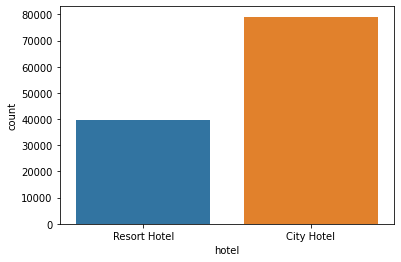

In [ ]:
sns.countplot(hotel_df.hotel)

We see that the city hotel has many more number of bookings compared to the resort hotel. 67 % of the bookings are for city hotel (as seen below).

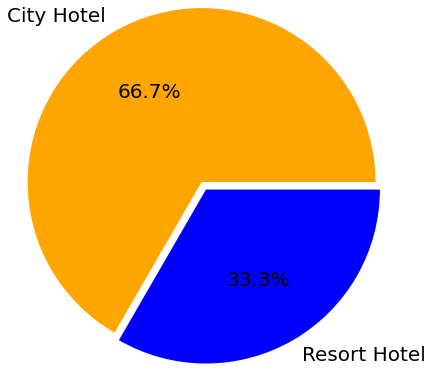

In [15]:
labels = hotel_df['hotel'].value_counts().index.tolist()
sizes = hotel_df['hotel'].value_counts().tolist()
explode = (0, 0.10)
colors = ['orange', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =0, textprops={'fontsize': 20},radius=2)
plt.show()

### Booking Cancellations

In the dataset, we see a lot of cancelled bookings. The 'is_canceled' contains this information with '0' referring to bookings that were not cancelled and '1' referring to cancelled bookings.

In [20]:
 hotel_df['is_canceled'].value_counts()

0    74590
1    44138
Name: is_canceled, dtype: int64

In [21]:
# percentage of cancelled bookings
(hotel_df['is_canceled'].value_counts()/hotel_df.shape[0])*100

0    62.824271
1    37.175729
Name: is_canceled, dtype: float64

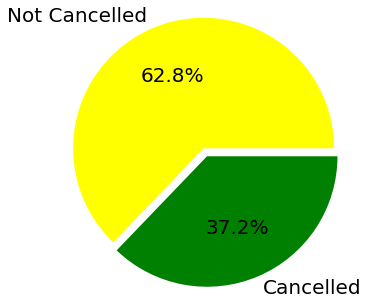

In [25]:
labels = hotel_df['is_canceled'].value_counts().index.tolist()
sizes = hotel_df['is_canceled'].value_counts().tolist()
explode = (0, 0.10)
colors = ['yellow', 'green']

plt.pie(sizes, explode=explode, labels=['Not Cancelled', 'Cancelled'], colors=colors, autopct='%1.1f%%',startangle =0, textprops={'fontsize': 20},radius=1.5)
plt.show()

Around 37 % of the total bookings were cancelled. We can gain more information about cancellations by hotel type.

In [ ]:
# cross table to compare the booking cancellation across the two hotels
cancel_by_hotel_type = pd.crosstab(hotel_df['hotel'],hotel_df['is_canceled'], rownames=['Hotel'], colnames=['Cancellation'])
cancel_by_hotel_type

Cancellation,0,1
Hotel,,
City Hotel,46082,33061
Resort Hotel,28508,11077


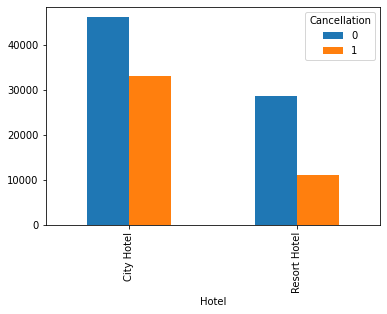

In [ ]:
# plotting
cancel_by_hotel_type.plot(kind='bar')

We already knew that the overall number of bookings are higher for city hotel and this can be seen in the above plot too. But from the plot we can also understand that the city hotel has a higher percentage of cancellations (i.e the number of cancellations with respect to the not cancelled bookings is higher for city hotel in comparison to resort hotel). This can be numerically confirmed by using the data from the crosstable 'cancel_by_hotel_type'.

In [ ]:
# the percentage of cancelled bookings for city hotel (cancelled city hotel bookings/total city hotel bookings*100)
print('Percentage of cancellation for City Hotel ',cancel_by_hotel_type[1][0]/(cancel_by_hotel_type[0][0] + cancel_by_hotel_type[1][0])*100)
# the percentage of cancelled bookings for resort hotel (cancelled resort hotel bookings/total resort hotel bookings*100)
print('Percentage of cancellation for Resort Hotel ',cancel_by_hotel_type[1][1]/(cancel_by_hotel_type[0][1] + cancel_by_hotel_type[1][1])*100)

Percentage of cancellation for City Hotel  41.773751310918215
Percentage of cancellation for Resort Hotel  27.982821775925228


We decided to exclude the cancelled bookings from the rest of the analysis and only conisder those where the guests checked in. As they haven't stayed at the hotels there is no reason to include the cancelled bookings in most of the analysis (for instance, the analysis of the busiest months where the cancelled bookings are not contributing).

In [26]:
# selecting those data where 'is_canceled' is zero i.e the bookings where guests checked in
hotel_checked_in_df = hotel_df[hotel_df['is_canceled'] == 0]

In [29]:
# confirm if the number of rows is same as that of the 'not cancelled'
hotel_checked_in_df.shape

(74590, 31)

Let us take a look at the distribution of bookings by hotel once again now that the cancelled bookings are ignored.

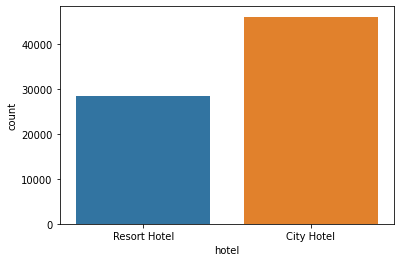

In [27]:
sns.countplot(data = hotel_checked_in_df, x='hotel')

## Which is the busiest year?

In [31]:
hotel_checked_in_df['arrival_date_year'].value_counts()

2016    36051
2017    24814
2015    13725
Name: arrival_date_year, dtype: int64

The dataset only contains booking information from three years (2015, 2016, and 2017). We can plot a pie chart and see the percentage of booking in each year.

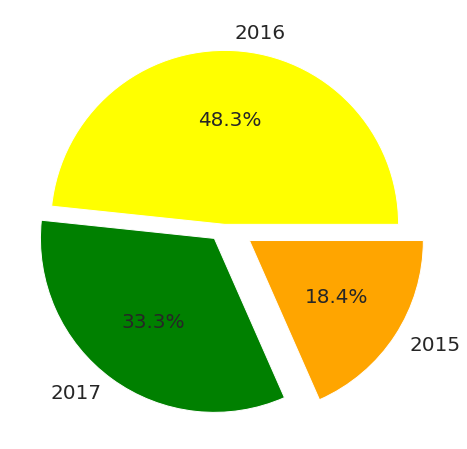

In [43]:
labels = hotel_checked_in_df['arrival_date_year'].value_counts().index.tolist()
sizes = hotel_checked_in_df['arrival_date_year'].value_counts().tolist()
explode = (0, 0.1, 0.17)
colors = ['yellow', 'green', 'orange']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =0, textprops={'fontsize': 20},radius=1)
plt.show()

From the chart we can easily identify that 2016 was the busiest year out of the three followed by 2017 and 2015. We can also make a comparison between the two hotels.

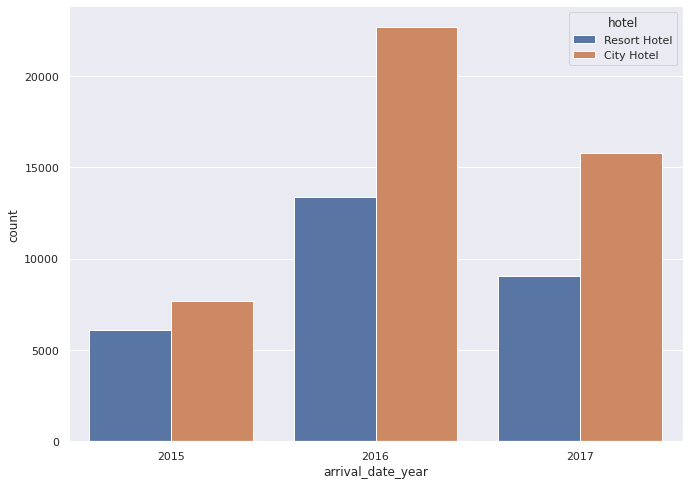

In [44]:
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data = hotel_checked_in_df, x='arrival_date_year', hue = 'hotel')

Both the hotels follow a distribution similar to the total bookings across the three years. But the resort hotel has lesser number of bookings relative to the city hotel each year. One interesting thing to note is that the difference in number of bookings is the smallest in 2015.

## Which is the busiest month across the year?

We will look at the data from the three years to see which is the busiest month (overall).

In [45]:
hotel_checked_in_df['arrival_date_month'].value_counts()

August       8604
July         7880
May          7091
October      6854
March        6566
April        6528
June         6384
September    6360
February     5304
November     4611
December     4347
January      4061
Name: arrival_date_month, dtype: int64

We can display the booking count in the order of months. This can be done by reindexing the pandas series.

In [47]:
# list for new index in the order of months
new_index = ['January','February','March','April','May','June','July','August','September','October','November','December']

# the series will be rearranged according to the new index
month_count = hotel_checked_in_df['arrival_date_month'].value_counts().reindex(new_index)
month_count

January      4061
February     5304
March        6566
April        6528
May          7091
June         6384
July         7880
August       8604
September    6360
October      6854
November     4611
December     4347
Name: arrival_date_month, dtype: int64

A bar graph of the booking count across the months can be plotted.

Text(0.5, 1.0, 'Number of Bookings Across Months')

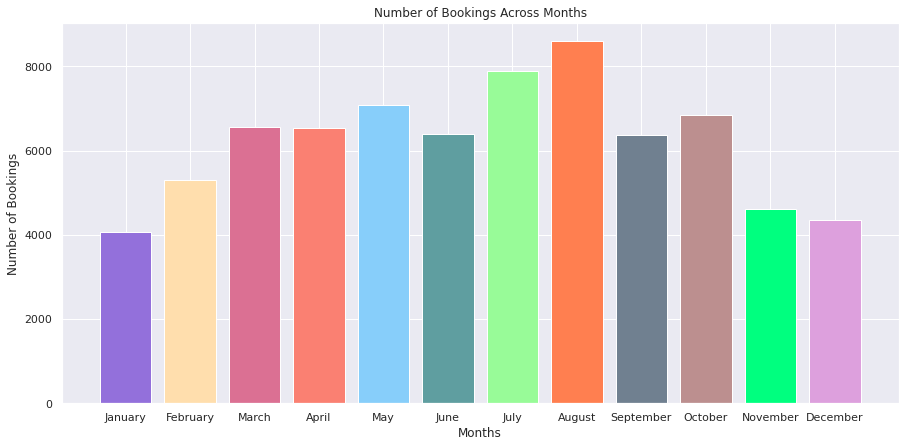

In [56]:
# setting x and y values
x_values = month_count.index
# y_values = month_count/month_count.sum()*100
y_values = month_count

# plotting number of bookings vs months
plt.figure(figsize=(15,7))
plt.bar(x_values,y_values, color = ['mediumpurple','navajowhite','palevioletred','salmon','lightskyblue','cadetblue','palegreen','coral','slategray','rosybrown','springgreen','plum'])
plt.xlabel('Months')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings Across Months')

August followed by July has the most number of bookings. The least busy time is the end and beginning of the year (November - February). March to October sees a fairly high and consistent number of bookings compared to that.

### Monthwise comparison between the hotels

The month-wise comparison can be done between the two hotels.

In [59]:
# new data frame with bookings from city hotel only
city_hotel_df = hotel_checked_in_df[hotel_checked_in_df['hotel'] == 'City Hotel']
# new data frame with bookings from city hotel only
resort_hotel_df = hotel_checked_in_df[hotel_checked_in_df['hotel'] == 'Resort Hotel']

In [62]:
# reindexing done to print value counts in month order
resort_hotel_month_count= resort_hotel_df['arrival_date_month'].value_counts().reindex(new_index)
resort_hotel_month_count

January      1812
February     2253
March        2517
April        2518
May          2523
June         2026
July         3110
August       3237
September    2077
October      2528
November     1937
December     1970
Name: arrival_date_month, dtype: int64

In [61]:
# reindexing done to print value counts in month order
city_hotel_month_count = city_hotel_df['arrival_date_month'].value_counts().reindex(new_index)
city_hotel_month_count

January      2249
February     3051
March        4049
April        4010
May          4568
June         4358
July         4770
August       5367
September    4283
October      4326
November     2674
December     2377
Name: arrival_date_month, dtype: int64

Percentage of bookings is plotted instead of booking count so that the distribution of bookings across months between resort and city hotel can be compared easily (as city hotel most likely has higher number of bookings across the months we won't be able to compare the trend closely if we plot booking count).

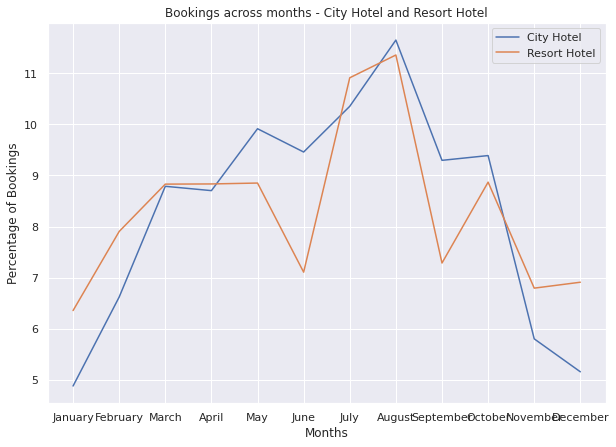

In [63]:
# setting the x and y values for both plots

# month names in order
x_city = city_hotel_month_count.index
# percentage of bookings of city hotel
y_city = (city_hotel_month_count/city_hotel_month_count.sum())*100
# month names in order
x_resort = resort_hotel_month_count.index
# percentage of bookings of city hotel
y_resort = (resort_hotel_month_count/resort_hotel_month_count.sum())*100

plt.figure(figsize=(10,7))
plt.plot(x_city, y_city, label = 'City Hotel')
plt.plot(x_resort, y_resort, label = 'Resort Hotel')
plt.title('Bookings across months - City Hotel and Resort Hotel')
plt.xlabel('Months')
plt.ylabel('Percentage of Bookings')
plt.legend()
plt.show()

The resort hotel has a higher percentage of booking in the beginning and end of the year (January, February, November, December) compared to the city hotel, while it has a lower percentage during May, June, September and October (Remember that this is not a comparison between the actual count but the percentage of their bookings).

### Month-wise comparison across the years

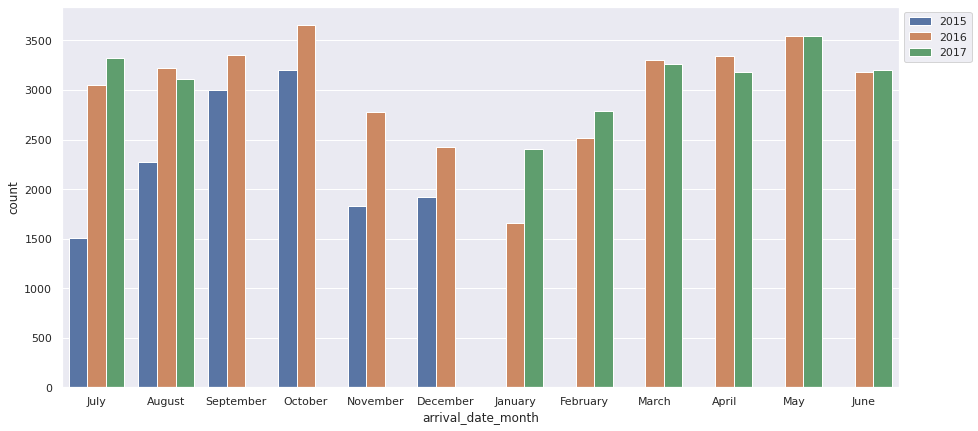

In [85]:
sns.set(rc = {'figure.figsize':(15,7)})
sns.countplot(data = hotel_checked_in_df, x='arrival_date_month', hue = 'arrival_date_year')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(bbox_to_anchor=(1.0, 1))

In [88]:
# cross table between months and years for overall bookings
pd.crosstab(hotel_checked_in_df['arrival_date_year'],hotel_checked_in_df['arrival_date_month'], rownames=['Year'], colnames=['Months'])

Months,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2015,0,2273,1920,0,0,1502,0,0,0,1831,3197,3002
2016,3343,3222,2427,2516,1658,3052,3183,3307,3548,2780,3657,3358
2017,3185,3109,0,2788,2403,3326,3201,3259,3543,0,0,0


In [89]:
# cross table between months and years for city hotel
pd.crosstab(city_hotel_df['arrival_date_year'],city_hotel_df['arrival_date_month'], rownames=['Year'], colnames=['Months'])

Months,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2015,0,1242,981,0,0,457,0,0,0,931,2061,1982
2016,2020,2123,1396,1436,926,2081,2201,1933,2237,1743,2265,2301
2017,1990,2002,0,1615,1323,2232,2157,2116,2331,0,0,0


In [90]:
# cross table between months and years for resort hotel
pd.crosstab(resort_hotel_df['arrival_date_year'],resort_hotel_df['arrival_date_month'], rownames=['Year'], colnames=['Months'])

Months,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2015,0,1031,939,0,0,1045,0,0,0,900,1136,1020
2016,1323,1099,1031,1080,732,971,982,1374,1311,1037,1392,1057
2017,1195,1107,0,1173,1080,1094,1044,1143,1212,0,0,0
